# T Student
Example macro describing the student t distribution

```cpp
root[0]: .x tStudent.C
```

It draws the pdf, the cdf and then 10 quantiles of the t Student distribution

based on Magdalena Slawinska's tStudent.C




**Author:** Juan Fernando Jaramillo Botero  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:13 AM.</small></i>

In [1]:
from ROOT import TH1D, TF1, TCanvas, kRed, kBlue
import ROOT

Welcome to JupyROOT 6.18/03


This is the way to force load of MathMore in Cling

In [2]:
ROOT.Math.MathMoreLibrary.Load()

Info in <ROOT::Math::MathMoreLibrary>: libMathMore has been loaded.


Create the pdf and the cumulative distributions

In [3]:
n = 100
a = -5.
b = 5.
pdf = TF1("pdf", "ROOT::Math::tdistribution_pdf(x,3.0)", a, b)
cum = TF1("cum", "ROOT::Math::tdistribution_cdf(x,3.0)", a, b)

Create the histogram and fill it with the quantiles

In [4]:
quant = TH1D("quant", "", 9, 0, 0.9)

for i in range(1, 10):
    quant.Fill((i-0.5)/10.0, ROOT.Math.tdistribution_quantile(0.1 * i,
                                                              3.0))

For each quantile fill with the pdf

In [5]:
xx = []
xx.append(-1.5)
for i in range(1, 9):
    xx.append(quant.GetBinContent(i))
xx.append(1.5)

pdfq = []
for i in range(9):
    nbin = int(n * (xx[i+1] - xx[i]) / 3.0 + 1.0)
    name = "pdf%d" % i
    pdfq.append(TH1D(name, "", nbin, xx[i], xx[i+1]))
    for j in range(1, nbin):
        x = j * (xx[i+1] - xx[i]) / nbin + xx[i]
        pdfq[i].SetBinContent(j, ROOT.Math.tdistribution_pdf(x, 3))

Warning in <TH1::TH1>: nbins is <=0 - set to nbins = 1


Create the Canvas and divide in four draws, for every draw set the line width
the title, and the line color.

In [6]:
Canvas = TCanvas("DistCanvas", "Student Distribution graphs", 10, 10, 800, 700)
pdf.SetTitle("Student t distribution function")
cum.SetTitle("Cumulative for Student t")
quant.SetTitle("10-quantiles  for Student t")
Canvas.Divide(2, 2)
Canvas.cd(1)
pdf.SetLineWidth(2)
pdf.DrawCopy()
Canvas.cd(2)
cum.SetLineWidth(2)
cum.SetLineColor(kRed)
cum.Draw()
Canvas.cd(3)
quant.Draw()
quant.SetLineWidth(2)
quant.SetLineColor(kBlue)
quant.SetStats(0)
Canvas.cd(4)
pdfq[0].SetTitle("Student t & its quantiles")
pdf.SetTitle("")
pdf.Draw()
pdfq[0].SetTitle("Student t & its quantiles")

Set the colors in every quantile.

In [7]:
i = 1
for pd in pdfq[1:]:
    pd.SetStats(0)
    i += 1
    pd.SetFillColor(i)
    pd.Draw("same")
Canvas.Modified()

Draw all canvases 

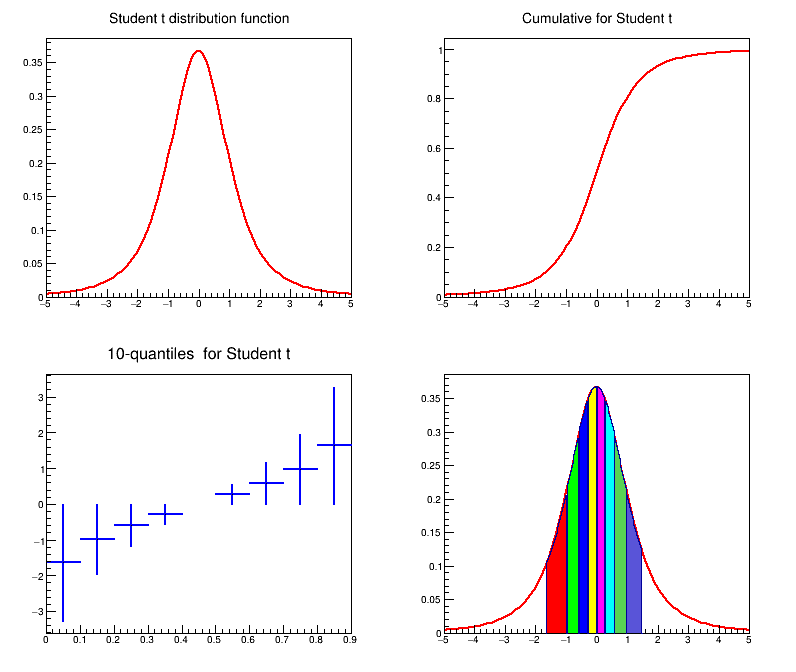

In [8]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()